In [ ]:
#Importiere alle Module
import numpy as np
import matplotlib.pyplot as plt
import Konstanten as k
import box
import teilchen as tn

# Create box:
simbox = box.Box(0.0, 100.0, 0.0, 100.0)
    
# Create teilchen
Teilchen_list = []
    #tn.Teilchen(1, 1.0, 45.0, 10.0, 0.0),
    #tn.Teilchen(2, 99.0, 55.0, -10.0, 0.0),
    #tn.Teilchen(3, 10.0, 50.0, 15.0, -15.0),
    #tn.Teilchen(4, 20.0, 30.0, -15.0, -15.0),
    #tn.Teilchen(5, 80.0, 70.0, 15.0, 15.0),
    #tn.Teilchen(6, 80.0, 60.0, 15.0, 15.0),
    #tn.Teilchen(7, 80.0, 50.0, 15.0, 15.0)

    
#Implementiere die Bewegungsgleichung

def bewegungs_dgl(s, i, Teilchen_list):
    """Differentialgleichung für N Teilchen, 
    die die Kraft auf ein Teilchen i beschreibt 
    (Gravitation und elektrische Abstoßung) 
    
    Argumente: 
    s: Statevektor des aktuellen Teilchens im Format [x, y, vx, vy]
    i: Index des aktuellen Teilchens
    Teilchen_list: Liste aller Objekte der Klasse Teilchen.
    
    Returns: 
    dgl: Beschleunigungsvektor als numpy-Array, 
    der für den aktuellen Zeitschritt auf ein Teilchen wirkt.
    """ 
    
    for i in Teilchen_list:
        s = tn.get_state()
    
    #Koordinaten der Gravitationsbeschleunigung als konstanter Startwert
    ax = 0
    ay = k.g
    
    for j in Teilchen_list:
        if i != j:
            s2 = tn.get_state()
            
            #Koordinaten des Abstands zu anderen Teilchen
            rx = s[0] - s2[0]
            ry = s[1] - s2[1]
            
            r_Betrag = np.sqrt(rx**2 + ry**2)
            r_hoch3 = r_Betrag**3
            
            #Berechnung der Abstoßungskraft (nur positiven Abstandsbeträgen)
            if r_hoch3 > 0:
                eKraft = k.q**2 / r_hoch3
                ax -= eKraft * rx
                ay -= eKraft * ry
    
    return np.array([s[2], s[3], ax, ay])
    
#Implementiere Runge-Kutta-Verfahren
dt = 0.001

def rk4_step(bewegungs_dgl, s, dt):
    """
    Berechnet approximativ aus der Bewegungsgleichung von oben
    einen aktualisierten Statevektoren für ein Teilchen
    Dabei wird z.B. auf den x-Wert des aktuellen Statevektoren
    der mit Runge-Kutta gemittelte vx-Wert multipliziert mit dt
    addiert. Eine simple Berechnung wie x_neu = x + vx * dt ist
    für unsere Simulation zu ungenau, da sich vx stetig ändert.
    Selbes gilt für vy bzw. die Werte von ax und ay.
    
    Argumente:
    bewegungs_dgl: oben beschrieben
    s: Statevektor des aktuellen Teilchens im Format [x,y,vx,vy]
    dt: Zeitschritt der Simulation
    
    Returns:
    aktualisierter Statevektor für ein Teilchen nach einem Zeitschritt
    """
    
    k1 = dt * bewegungs_dgl(s, i, Teilchen_list)
    k2 = dt * bewegungs_dgl(s + 0.5 * k1, i, Teilchen_list)
    k3 = dt * bewegungs_dgl(s + 0.5 * k2, i, Teilchen_list)
    k4 = dt * bewegungs_dgl(s + k3, i, Teilchen_list)
    
    return s + k1/6 + k2/3 + k3/3 + k4/6

#!!! Implementiere Reflexion an Boxwänden (UNVOLLSTÄNDIG)

def reflexion_nach_rk4(Statevektoren_list, dt):
    """
    Prüft ob im nächsten Zeitschritt eine Reflexion stattfindet
    Berechnet den genauen Zeitpunkt der Kollision mit den Wänden
    Leitet Reflexion ein und berechnet den korrigierten Statevektor
    
    Argumente:
    Statevektoren_list: Liste mit den aktuellen Zuständen aller Teilchen
                        nach dem Format [[x,y,vx,vy], ...]
    dt: Zeitschritt der Simulation
    
    Returns:
    Neue Liste mit den Statevektor der Teilchen nach dt (und eventueller Reflektion)
    """
    
    Statevektoren_update =[]
    for p in Statevektoren_list
    t_kollx, t_kolly = dt, dt #Standardwert ohne Kollision im Zeitschritt dt
    
    #Test
    if 
    if tn.x <= box.xmin or tn.x >= box.xmax:
    tn.vx *= -1
    
       if tn.y <= box.ymin or tn.y >= box.ymax:
            tn.vy *= -1

#!!! Berechnung der Systemenergie (UNVOLLSTÄNDIG)

#def E_sys(tn.i, dt):
    #Berechnung der einzelnen Energieformen pro Teilchen und dt
#    E_kin = 0.5 * k.m * (tn.vx**2 + tn.vy**2)
#    E_pot = - k.m * k.g * tn.y
#    E_q = 0.5 * k.q**2 / r_Betrag #(hier eventuell die for Schleife von oben wiederholen oder sum())
    
#    return E_kin + E_pot + E_q

#Liste mit den aktuellen Statevektoren
Statevektoren_list = [p.get_state() for p in Teilchen_list]

#Liste mit neuen Statevektoren
Statevektoren_update = reflexion_nach_rk4(Statevektoren_list, box, dt)

#Aktualisiere die Statevektoren der aller Teilchen für den nächsten Zeitschritt
for p, state_step in zip(Teilchen_list, Statevektoren_update):
    tn.set_state(state_step)

#print(Teilchen)

#Erstelle Output als Tabelle mit allen 30 Simulationsdaten pro Zeile bzw. Zeitschritt

import csv
with open("simulation_output.csv", "w", newline = "") as file:
    writer = csv.writer(datei)
    
    #Kopfzeile der Tabelle mit den Messgrößen
    Messgrößen = ["t", "E_sys"]
    for i in range(len(teilchen)):
        Messgrößen.extend([f"x{i+1}",f"y{i+1}", f"vx{i+1}", f"vy{i+1}"])
    writer.writerow(Messgrößen)
    
    #Simulationsschleife
    t = 0.000
    t_max = 10.000
    
    while t <= t_max:
        
        #Finale Liste mit den Informationen aller Teilchen (mit Reflexion) je dt
        Statevektoren_list = [p.get_state() for p in Teilchen_list]
        
        #Systemenergie berechnen je dt
        E_sys = 5
        
        #Zeile in Datei zufügen
        zeile = [t, E_sys]
        for p in Statevektoren_list:
            zeile.extend(p)
        writer.writerow(zeile)
        
        #Zeitverlauf der Simulation
        t += dt

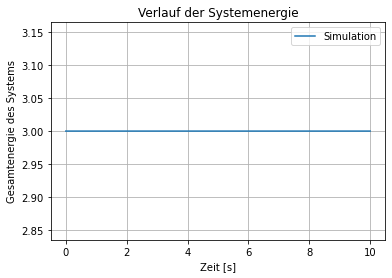

In [11]:
#Plot für Verlauf der Systemenergie in Abhängigkeit der Zeit

import matplotlib.pyplot as plt

#Die folgenden Werte sind Testwerte für die korrekte Zeitreihe,
#um einen möglichst konstanten Verlauf für die Energie darzustellen.

t = [i*0.001 for i in range(0,10001,1)]
Esys = [3 for n in range(0,10001)]

plt.plot(t, Esys, label = 'Simulation')
plt.xlabel("Zeit [s]")
plt.ylabel("Gesamtenergie des Systems")
plt.title("Verlauf der Systemenergie")

plt.legend()
plt.grid(True)
plt.show()

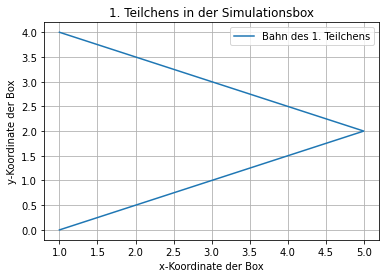

In [19]:
#Plot für Bahn des ersten Teilchens

import matplotlib.pyplot as plt

#Die folgenden Werte sind Testwerte für 9 Zeitschritte,
#um die Darstellung einer Bahn in der Box zu testen.

x1=[1,2,3,4,5,4,3,2,1]
y1=[0,0.5,1.0,1.5,2,2.5,3,3.5,4]

plt.plot(x1, y1, label = 'Bahn des 1. Teilchens')
plt.xlabel("x-Koordinate der Box")
plt.ylabel("y-Koordinate der Box")
plt.title("1. Teilchens in der Simulationsbox")

plt.legend()
plt.grid(True)
plt.show()

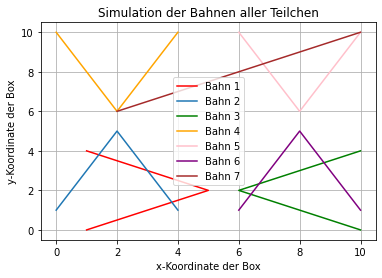

In [17]:
#Plot für die Bahnen aller Teilchen mit verschiedenen Farben

import matplotlib.pyplot as plt

#Die folgenden Werte sind Testwerte für 9 Zeitschritte,
#um die Darstellung von mehreren Bahnen zu testen.

x1=[1,2,3,4,5,4,3,2,1]
y1=[0,0.5,1.0,1.5,2,2.5,3,3.5,4]
x2=[0,0.5,1.0,1.5,2,2.5,3,3.5,4]
y2=[1,2,3,4,5,4,3,2,1]
x3=[10,9,8,7,6,7,8,9,10]
y3=[0,0.5,1.0,1.5,2,2.5,3,3.5,4]
x4=[0,0.5,1.0,1.5,2,2.5,3,3.5,4]
y4=[10,9,8,7,6,7,8,9,10]
x5=[6,6.5,7,7.5,8,8.5,9,9.5,10]
y5=[10,9,8,7,6,7,8,9,10]
x6=[6,6.5,7,7.5,8,8.5,9,9.5,10]
y6=[1,2,3,4,5,4,3,2,1]
x7=[2,3,4,5,6,7,8,9,10]
y7=[6,6.5,7,7.5,8,8.5,9,9.5,10]

fig, ax = plt.subplots()
ax.plot(x1,y1, color='red', label='Bahn 1')
ax.plot(x2,y2, label='Bahn 2')
ax.plot(x3,y3, color='green', label='Bahn 3')
ax.plot(x4,y4, color='orange', label='Bahn 4')
ax.plot(x5,y5, color='pink', label='Bahn 5')
ax.plot(x6,y6, color='purple', label='Bahn 6')
ax.plot(x7,y7, color='brown', label='Bahn 7')

plt.xlabel("x-Koordinate der Box")
plt.ylabel("y-Koordinate der Box")
plt.title("Simulation der Bahnen aller Teilchen")
plt.legend()
plt.grid(True)
plt.show()